## Demonstration of Exploratory Analysis (Loan Status Dataset)  --  Preprocessing (Handling Missing/Categorical Data) --  Deep Learning Classification  

**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**---------------------------------------------------**

**Structure**

*Initially, an exploratory analysis (Python-Jupyter Notebook) is presented to highlight key relationships between multiple features/variables of different data types (numerical,categorical/object) that are included in a 'Bank Loan Status' dataset (.csv file format). The analysis enables the identification of meaningful insights for predicting whether an individual that  wants to apply for a loan will be capable of paying it back or not.*

*In addition, a demonstration of Data Preprocessing is also provided since it allows to **a)** handle efficiently possible missing values/entries with respect to each dataset feature and **b)** modify the categorical features in order to be inserted as ML model inputs(independent variables) during the neural network training process (dropping features/creating dummy variables where applicable)*

*Finally, a Deep Learning model (neural network) is constructed that takes the selected bank loan features as model inputs for training purposes,'learns' the key relationships between input-output training data and predicts whether or not a new customer will be capable of paying back the acquired loan.*

*The evaluation of the ML neural network model performance is based on its ability to classify (successfully or not) whether the Loan Status of an individual will be 'Fully Paid' or 'Charged off', (classification_report-confusion matrix metrics) and this is why 90% of the data are to be used for network training and 10% for validation purposes.* 


**The Dataset (.csv file format) for this project has been obtained from Kaggle:**

"*Bank Loan Status Dataset*" -- File: "credit_test.csv" -- Source: https://www.kaggle.com/zaurbegiev/my-dataset 

In [1]:
# Importing the libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
# Importing the Bank Loan Dataset
dataset=pd.read_csv('credit_train.csv')


In [3]:
# Setting an index name
dataset.index.names = ['Serial ID']

In [4]:
# Viewing the first 3 features entries and the related information for each dataset column
dataset.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Serial ID,,,,,,,,,,,,,,,,,,,
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0


In [5]:
# Number of entries (rows) and features (columns)
dataset.shape

(100000, 19)

In [6]:
# Information regarding a) the data type of each feature and b) total values per feature
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null int64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null int64
Number of Credit Problems       100000 non-null int64
Current Credit Balance          100000 non-null int64
Maximum Open 

## A. Exploratory Analysis

*The scope of this analysis is to perform initial investigations on data in order to discover patterns and to explore/highlight the relationships between the different features with the help of statistics and graphical representations. Therefore, feature data can be investigated (individually or combined with other variables), so as to **a)** extract useful information (trends, correlations with the other independent and dependent variables) and **b)** assess whether or not each dataset feature can be used as input for the training process of the ML model.*

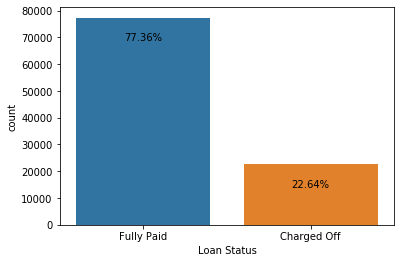

In [7]:
# Due to the binary nature of the dependent(output) parameter (Loan Status:'Fully Paid'/'Charged Off'), the countplot is 
# employed to observe whether or not the training samples are balanced.
total = len(dataset['Loan Status'])
count_loan_status=sns.countplot(x='Loan Status',data=dataset)
for p in count_loan_status.patches:
    count_loan_status.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha = 'center', va = 'center', xytext = (0, -20), textcoords = 'offset points')


In [8]:
# As it can be observed from the previous countplot and from the value_counts() function, the samples are unbalanced 
# (77.36% Fully Paid vs 22.64% Charged Off), therefore in order to assess the model's classification capabilities,
# the F1-Score metric(based on the Confusion Matrix Precision and Recall) outcome is selected
dataset['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

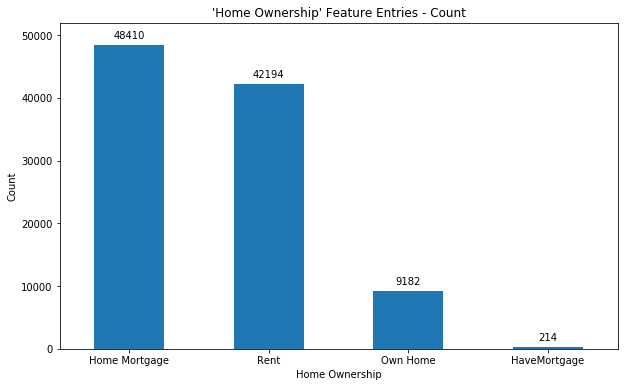

In [9]:
# Home Ownership unique sub-categories together with their total entries count
plt.figure(figsize=(10,6))
home_owner=dataset['Home Ownership'].value_counts().plot(kind='bar')
plt.ylim(0,52000)
plt.title("'Home Ownership' Feature Entries - Count")
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=0);
for p in home_owner.patches:
    home_owner.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center',  xytext = (0,10), textcoords = 'offset points')


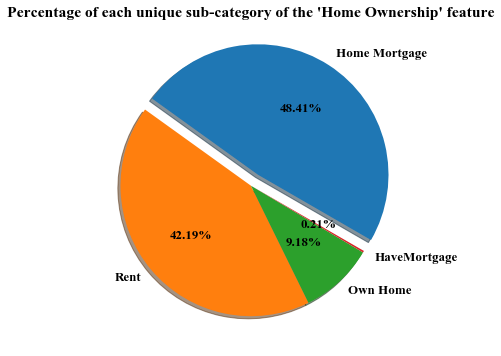

In [10]:
#Percentage of each unique sub-category of the 'Home Ownership' feature
fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.family'] = 'Times New Roman, serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=13
labels =['Home Mortgage','Rent','Own Home','HaveMortgage']
count = [48410, 42194,9182,214]
explode = (0.1,0, 0, 0)
ax.pie(count,explode=explode,labels=labels,  
       autopct='%1.2f%%', 
       
       shadow=True, startangle=-30,   
       )
ax.set_title("Percentage of each unique sub-category of the 'Home Ownership' feature");

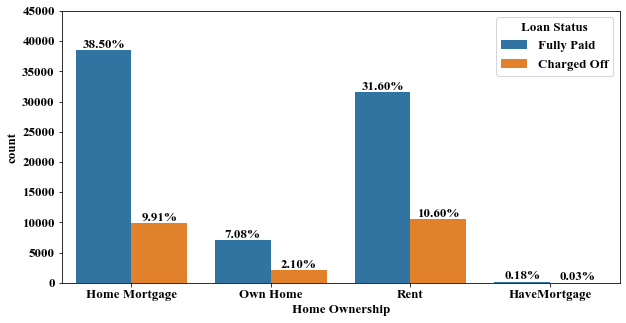

In [11]:
# Home Ownership sub-categories based on the Loan Status. As it can be observed from this plot and function pie chart,
# 90.6% of previous bank loan clients had been either on a Home Mortgage or on Rent
total = len(dataset['Home Ownership'])
plt.figure(figsize=(10,5))
plt.ylim(0,45000)
count_home_own=sns.countplot('Home Ownership',data=dataset,hue='Loan Status');
for p in count_home_own.patches:
    count_home_own.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha = 'center', va = 'center',  xytext = (0,5), textcoords = 'offset points')


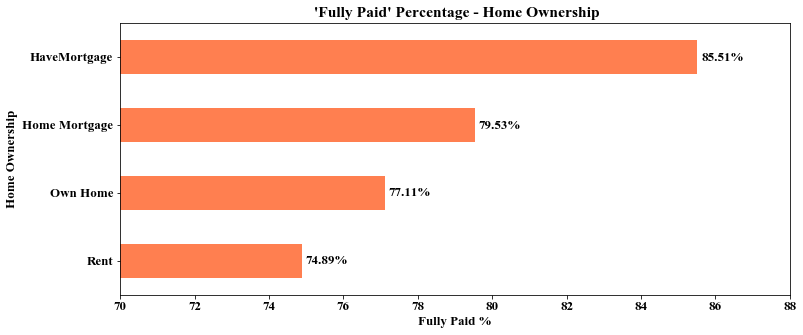

In [12]:
# Grouping the Loan Status 'Fully Paid', 'Charged Off' values by Home Ownership
fully_paid = dataset[dataset['Loan Status']=="Fully Paid"].groupby("Home Ownership").count()['Loan Status']
charged_off = dataset[dataset['Loan Status']=="Charged Off"].groupby("Home Ownership").count()['Loan Status']

# Displaying the percentage of bank clients who fully paid their loan based on their Home Ownership type.
fully_paid_perc= 100*(fully_paid/(fully_paid+charged_off))
fully_paid_perc

# Percentage plot of 'Fully Paid' loans for all 'Bankruptcies' feature types.
# Clients on Rent have the smallest 'pay loan back' percentage compared to the other 'Home Ownership' types
plt.figure(figsize=(12,5))
homeown_percentages=fully_paid_perc.sort_values().plot(kind='barh',color=['coral'])
plt.xlabel('Fully Paid %',fontweight='bold')
plt.ylabel('Home Ownership')
plt.title(" 'Fully Paid' Percentage - Home Ownership",fontweight='bold')
plt.xlim(70,88)
plt.xticks(rotation=0)
for i in homeown_percentages.patches:
    
    homeown_percentages.text(i.get_width()+.1, i.get_y()+.20, \
            str(round((i.get_width()), 2))+'%', fontsize=13);

In [13]:
#'Years in current job' unique sub-categories  together with their total entries count
dataset['Years in current job'].value_counts()


10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64

In [14]:
# The 'Years in current job feature' has 4222 missing values
dataset['Years in current job'].isnull().sum()

4222

In [15]:
# The entries of the 'Years in current job' feature are not sorted correctly with the use of the sorted() function. Missing 
#values have been dropped (dropna() function)
sorted(dataset['Years in current job'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [16]:
# Manually sorting the 'Years in current job' entries 
years_sorted=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

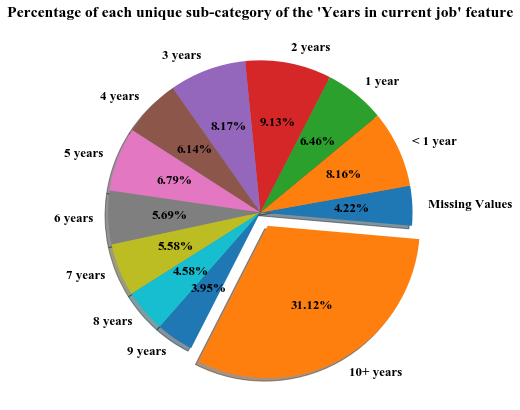

In [17]:
# Percentage of each unique sub-category of the 'Years in current job' feature
fig, ax = plt.subplots(figsize=(7,7))

plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.family'] = 'Times New Roman, serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=13
labels =['Missing Values','< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years',
         '8 years','9 years','10+ years']
counts = [4222,8164, 6460,9134,8169,6143,6787,5686,5577,4582,3955,31121]
           
explode=(0,0,0,0,0,0,0,0,0,0,0,0.1)
ax.pie(counts,explode=explode,labels=labels,  
       autopct='%1.2f%%',
       
       shadow=True, startangle=-5,   
       )
ax.set_title("Percentage of each unique sub-category of the 'Years in current job' feature");


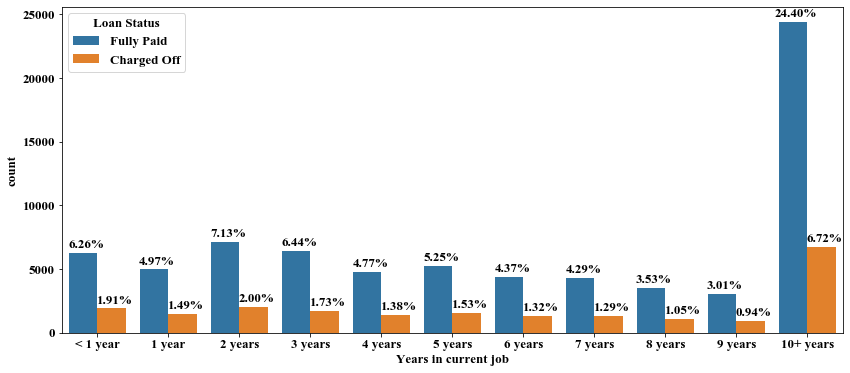

In [18]:
# 'Years in current job'feature. By inserting into the countplot 'order' the updated 'years_sorted' list, the years
# in the x-axis are now displayed correctly. Based on the countplot and on the previously applied value_counts() function,
# 31.12% of bank customers that obtained bank loans in the past had been in their current job for 10+ years
total = len(dataset['Years in current job'])
plt.figure(figsize=(14,6))
count_years=sns.countplot('Years in current job',data=dataset,hue='Loan Status',order=years_sorted);
for p in count_years.patches:
    count_years.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',  xytext = (3,8), textcoords = 'offset points')


In [19]:
# Grouping the Loan Status 'Fully Paid', 'Charged Off' values by 'Years in current job'
f_paid = dataset[dataset['Loan Status']=="Fully Paid"].groupby("Years in current job").count()['Loan Status']
charg_off = dataset[dataset['Loan Status']=="Charged Off"].groupby("Years in current job").count()['Loan Status']

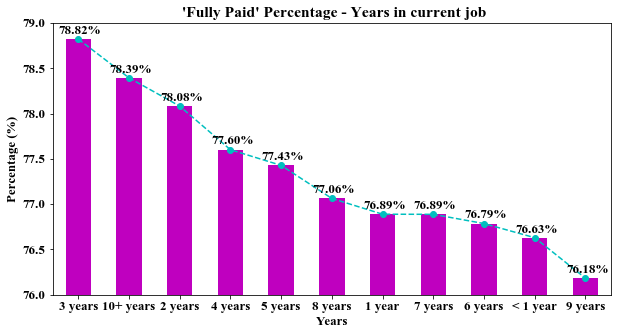

In [20]:
# Displaying the percentage of bank clients who fully paid their loan based on the 'Years in current job' feature
# All sub-categories of this dataset feature have similar 'Fully Paid' percentages as they vary between 76.18-78.82%.
f_paid_perc= 100*(f_paid/(f_paid+charg_off))
count_years_perc=f_paid_perc.sort_values(ascending=False)
plt.figure(figsize=(10,5))
percentages=count_years_perc.plot(kind='bar',color=['m'])
plt.plot(count_years_perc,marker='o',linestyle='dashed',color='c')
plt.xticks(rotation=0)
plt.ylim(76,79)
plt.title(" 'Fully Paid' Percentage - Years in current job",fontweight="bold")
plt.xlabel('Years',fontweight="bold")
plt.ylabel('Percentage (%)',fontweight="bold");
for p in percentages.patches:
    percentages.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',  xytext = (2,8), textcoords = 'offset points');


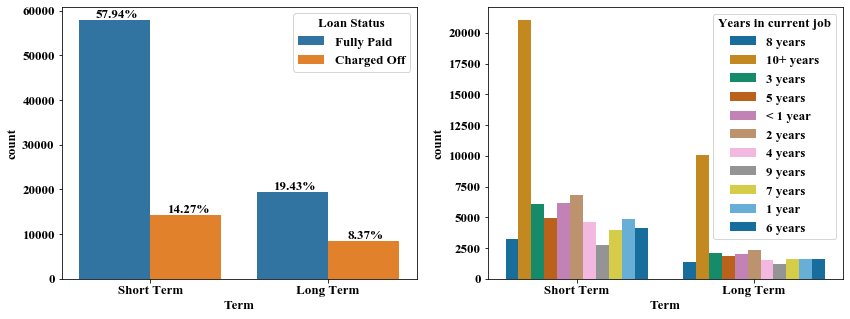

In [21]:
# First subplot: Total value counts of 'Fully Paid'/'Charged Off' loans grouped by the unique elements of the 'Term' feature. 
# The majority of past borrowers had acquired Short Term loans. As it can be derived by observing the first subplot,
# the ratio of 'Fully Paid / Charged Off' Loans is much higher for Short Term loans (ratio ~ 4) as compared to the 
# Long Term loans (ratio = 2.32). 
# Second subplot:Regarding the relationship between the 'Years in current job' and the 'Term' features, as expected, 
# the majority of past borrowers had been in their current job for more than 10 years (for both Short and Long Term Loans).

fig, ax = plt.subplots(1, 2,figsize=(14,5))
count_term=sns.countplot('Term',data=dataset,ax=ax[0],hue='Loan Status');
total = len(dataset['Term'])
for p in count_term.patches:
    count_term.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center',  xytext = (2,5), textcoords = 'offset points')

sns.countplot('Term',data=dataset,ax=ax[1],hue='Years in current job',palette='colorblind');


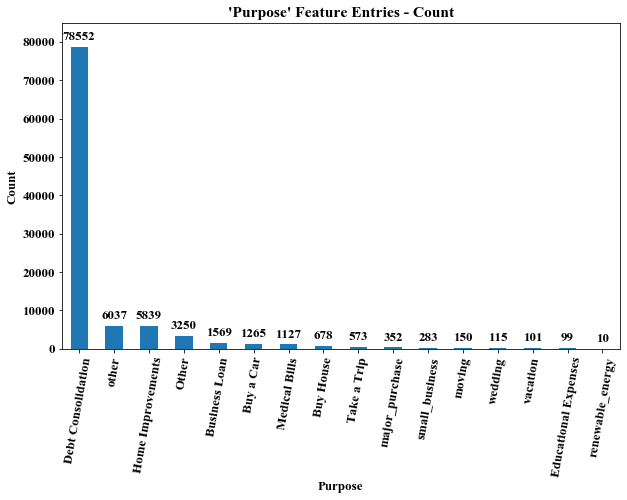

In [22]:
# 'Purpose' unique sub-categories together with their total entries count

plt.figure(figsize=(10,6))
purp=dataset['Purpose'].value_counts().plot(kind='bar')

plt.ylim(0,85000)

plt.title("'Purpose' Feature Entries - Count")
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=80)
for p in purp.patches:
    purp.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',  xytext = (0,10), textcoords = 'offset points')


In [23]:
# By applying the value_counts() function in the previous cell for the 'Purpose' feature, the existence of two  
# identical sub-categories has been observed and as a result the entries of 'other' and 'Other' categories are combined under
# a new category termed as 'OtherPurposes'
dataset['Purpose']=dataset['Purpose'].replace(['other','Other'],'OtherPurposes')

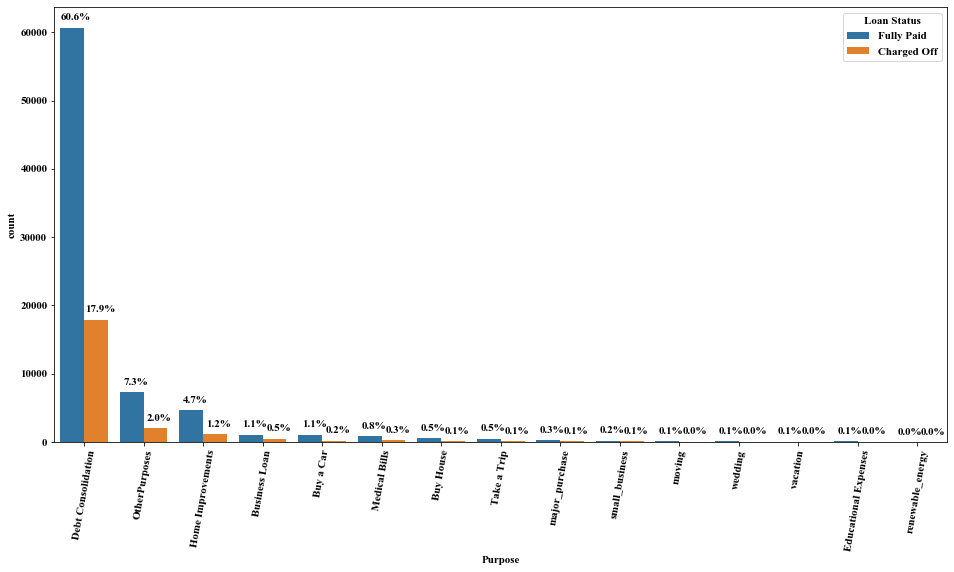

In [24]:
# Based on the previously applied value_counts() function and from the dataset's 'Purpose' countplot, 
# approximately 78.5% of the previous bank customers' loans are for Debt Consolidation and only 21.5%
# for the other sub-categories of this feature

plt.figure(figsize=(16,8))
plt.rcParams['font.size']=11
purp_per=sns.countplot('Purpose',data=dataset,hue='Loan Status',order=dataset['Purpose'].value_counts().index)
plt.xticks(rotation=80);
for p in purp_per.patches:
    purp_per.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',  xytext = (4,10), textcoords = 'offset points')


In [25]:
# Grouping the Loan Status 'Fully Paid', 'Charged Off' values by 'Purpose'
purpose_paid = dataset[dataset['Loan Status']=="Fully Paid"].groupby("Purpose").count()['Loan Status']
purpose_charg_off = dataset[dataset['Loan Status']=="Charged Off"].groupby("Purpose").count()['Loan Status']

# Determining the Percentage of bank clients that fully paid back their loan based on the 'Purpose' entries.  

purpose_paid_perc= 100*(purpose_paid/(purpose_paid+purpose_charg_off))
purpose_paid_perc.sort_values(ascending=False)

Purpose
Buy a Car               83.952569
Educational Expenses    81.818182
Home Improvements       80.082206
wedding                 80.000000
Take a Trip             79.930192
Buy House               79.351032
OtherPurposes           78.184559
Debt Consolidation      77.189632
major_purchase          76.704545
Medical Bills           75.332742
moving                  71.333333
vacation                71.287129
Business Loan           69.534736
renewable_energy        60.000000
small_business          57.950530
Name: Loan Status, dtype: float64

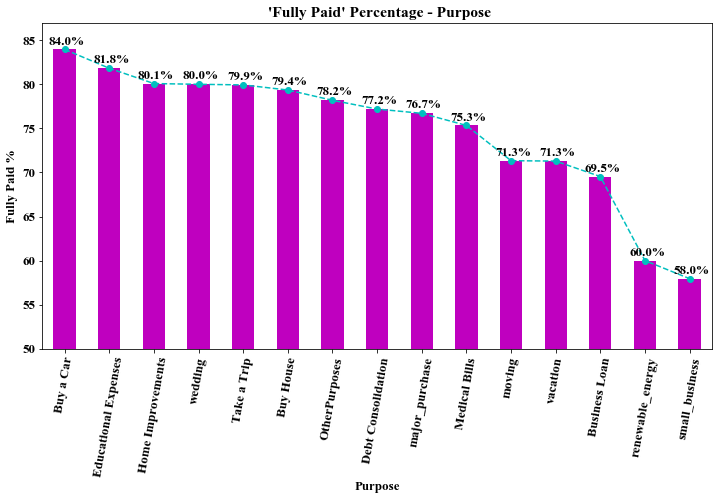

In [26]:
# Percentage plot of 'Fully Paid' loans for all 'Purpose' sub-categories.
# 'Small Business' and'Renewable Energy'loans have the smallest paying back rate, whereas 'Buy a Car' and'Educational Expenses' 
# loans have the highest paying back percentage.
plt.figure(figsize=(12,6))
plt.rcParams['font.size']=13
purpose_p=purpose_paid_perc.sort_values(ascending=False)
purp_percentages=purpose_paid_perc.sort_values(ascending=False).plot(kind='bar',color=['m'])
plt.plot(purpose_p,marker='o',linestyle='dashed',color='c')
plt.title(" 'Fully Paid' Percentage - Purpose",fontweight='bold')
plt.xlabel('Purpose',fontweight='bold')
plt.ylabel('Fully Paid %',fontweight='bold')
plt.ylim(50,87)
plt.xticks(rotation=80)
for p in purp_percentages.patches:
    purp_percentages.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha = 'center', va = 'center',  xytext = (2,8), textcoords = 'offset points');


In [27]:
# The majority of borrowers has not declared Bankruptcy as only 11% of them have declared bankruptcy once or twice.
# The remaining entries represent a very small percentage of this feature(0.13%),and they are grouped together as '3plus'.
# Τhe sub-categories are to be renamed as 'No Bankruptcy','Once','Twice'and'3plus'
dataset['Bankruptcies']=dataset['Bankruptcies'].replace([0,1,2],['No Bankruptcy','Once','Twice'])
dataset['Bankruptcies']=dataset['Bankruptcies'].replace([3,4,5,6,7],'3plus')

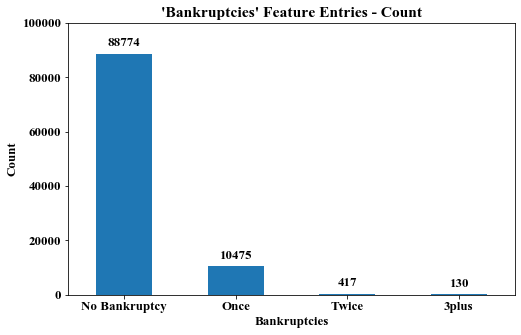

In [28]:
# Total value counts of each Bankruptcy group
plt.figure(figsize=(8,5))

bank_data=dataset['Bankruptcies'].value_counts().plot(kind='bar')
plt.title("'Bankruptcies' Feature Entries - Count")
plt.xlabel('Bankruptcies')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.ylim(0,100000)
for p in bank_data.patches:
    bank_data.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


In [29]:
# Grouping the Loan Status 'Fully Paid', 'Charged Off' values by 'Bankruptcies'
bankrupt_paid = dataset[dataset['Loan Status']=="Fully Paid"].groupby("Bankruptcies").count()['Loan Status']
bankrupt_charg_off = dataset[dataset['Loan Status']=="Charged Off"].groupby("Bankruptcies").count()['Loan Status']

In [30]:
# Percentage of bank clients that fully paid back their loan based on the 'Bankruptcies' entries.
# Bank customers percentage of 'Fully Paid' back  loan is around (~78%) for most sub-categories

bankrupt_paid_perc= 100*(bankrupt_paid/(bankrupt_paid+bankrupt_charg_off))
bankrupt_paid_perc

Bankruptcies
3plus            79.230769
No Bankruptcy    77.264740
Once             78.167064
Twice            77.937650
Name: Loan Status, dtype: float64

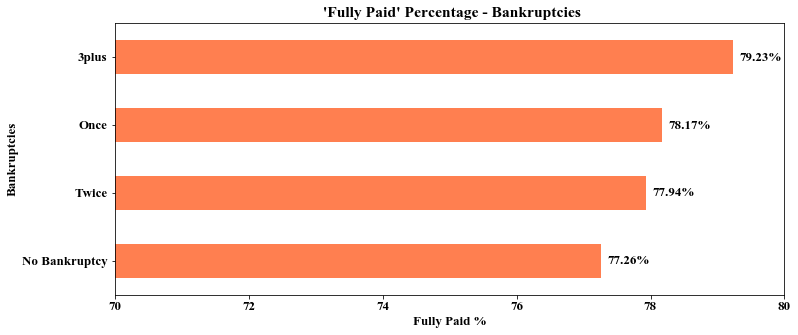

In [31]:
# Percentage plot of 'Fully Paid' loans for all 'Bankruptcies' feature types

plt.figure(figsize=(12,5))
bank_percentages=bankrupt_paid_perc.sort_values().plot(kind='barh',color=['coral'])
plt.xlabel('Fully Paid %',fontweight='bold')
plt.ylabel('Bankruptcies')
plt.title(" 'Fully Paid' Percentage - Bankruptcies",fontweight='bold')
plt.xlim(70,80)
plt.xticks(rotation=0)
for i in bank_percentages.patches:
    
    bank_percentages.text(i.get_width()+.1, i.get_y()+.20, \
            str(round((i.get_width()), 2))+'%', fontsize=13);




In [32]:
# Since the percentage of 'Fully' paid loans for all bankruptcies is approximately the same for all the sub-categories, 
# this feature is to be dropped as its contribution to the neural network training process would have been insufficient
dataset=dataset.drop('Bankruptcies',axis=1)

In [33]:
# As the scope of this project is to use past Bank Loan Data as inputs to a neural network model to predict
# whether  new individuals are capable of fully paying back their loans, the 'Current Loan Amount' feature is renamed to
# 'Loan Amount', so as to indicate the original loan amount acquired by past borrowers
dataset.rename(columns={'Current Loan Amount':'Loan Amount'},inplace=True)

In [34]:
# Percentage of Borrowers with Loan Amount <= 400000
dataset['Loan Amount'][dataset['Loan Amount']<=400000].count()* 100/len(dataset['Loan Amount'])


63.174

In [35]:
# Percentage of Borrowers with Loan Amount<=800000
dataset['Loan Amount'][dataset['Loan Amount']<=800000 ].count()* 100/len(dataset['Loan Amount'])


88.516

In [36]:
# Percentage of Borrowers with Loan Amount between 400000-800000
dataset['Loan Amount'][(dataset['Loan Amount']>=400000) 
                               & (dataset['Loan Amount']<=800000)].count()* 100/len(dataset['Loan Amount'])


25.342

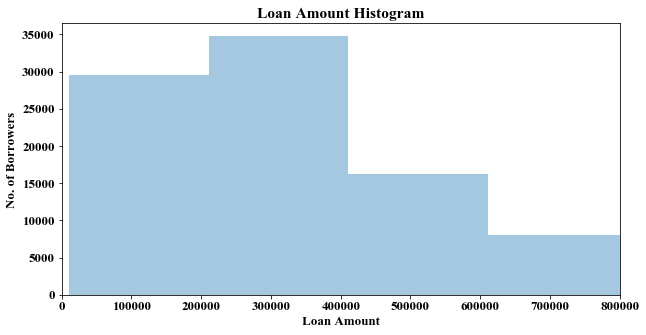

In [37]:
# 'Loan Amount 'histogram plot showing the total amount of borrowers having acquired in the past loan amounts ranging between
# 0-200000,200000-400000,400000-600000 and 600000-800000.
# Around 88.3% of the past borrowers had acquired a loan up to 800000.
# In particular, as determined in the previous cells, approximately 63.2% of them had a 'Loan Amount' up to 400000 and around 
# 25.3% of them between 400000-800000
plt.figure(figsize=(10,5))
sns.distplot(dataset['Loan Amount'],kde=False,bins=500)
plt.title('Loan Amount Histogram')
plt.ylabel('No. of Borrowers')
plt.xlim(0,800000);


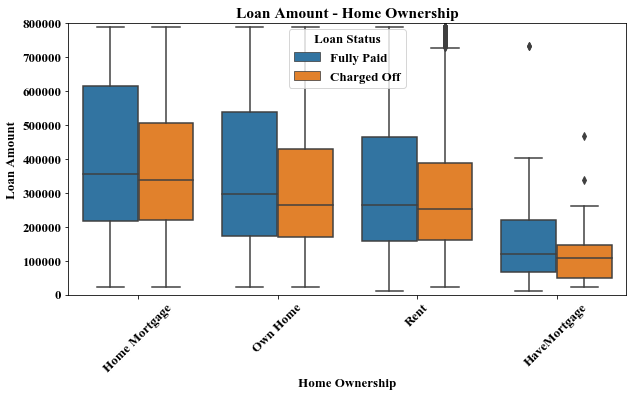

In [38]:
# # Boxplot used to explore the relationship between different features. The relationship between the Loan Amount and 
# Home Ownership is explored for Loan Amount up to 800000, based on Loan Status. For each sub-category of the Home Ownership
# variable,the median 'Loan Amount' values with respect to 'Fully Paid' and 'Charged Off' loans are of small difference.
plt.figure(figsize=(10,5))
sns.boxplot(x='Home Ownership',y='Loan Amount',data=dataset,hue='Loan Status')
plt.title('Loan Amount - Home Ownership')
plt.ylim(0,800000)
plt.xticks(rotation=45);

In [39]:
# Loan Amount summary statistics based on Loan Status. As it can be observed from the use of the describe() function, most
# statisics have similar values for both 'Fully Paid' and 'Charged Off''loans
dataset[dataset['Loan Amount']<=800000].groupby('Loan Status')['Loan Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,22639.0,324975.226821,185905.916383,21450.0,179883.0,286726.0,439835.0,789250.0
Fully Paid,65877.0,307962.358183,186187.153026,10802.0,165770.0,265012.0,430276.0,789250.0


In [40]:
# Percentage of Borrowers with Monthly Debt<=50000
dataset['Monthly Debt'][(dataset['Monthly Debt']<=50000)].count()* 100/len(dataset['Monthly Debt'])

97.856

In [41]:
# Percentage of Borrowers with Monthly Debt<=10000
dataset['Monthly Debt'][dataset['Monthly Debt']<=10000].count()* 100/len(dataset['Monthly Debt'])

24.209

In [42]:
# Percentage of Borrowers with Monthly Debt ranging between (10000,30000]
dataset['Monthly Debt'][(dataset['Monthly Debt']>10000) 
                               & (dataset['Monthly Debt']<=30000)].count()* 100/len(dataset['Monthly Debt'])

61.828

In [43]:
# Percentage of Borrowers with Monthly Debt ranging between (30000,50000]
dataset['Monthly Debt'][(dataset['Monthly Debt']>30000) 
                               & (dataset['Monthly Debt']<=50000)].count()* 100/len(dataset['Monthly Debt'])

11.819

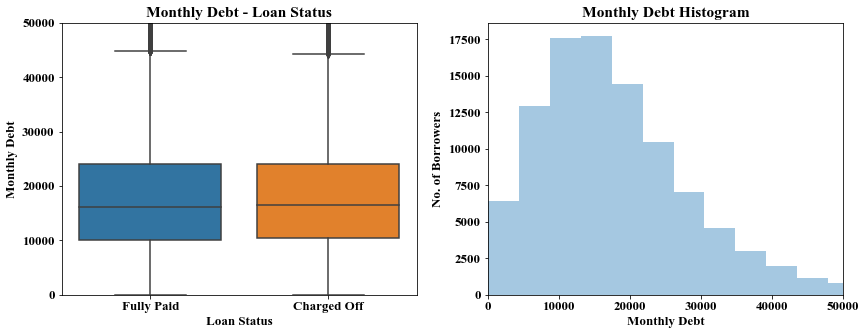

In [44]:
# Relationship between Loan Status-Monthly Debt is provided for monthly debts <=50000 as this range comprises ~98% of this
# dataset feature entries. As it can be observed from the boxplot presented in this cell and from the summary statistics
# presented in the next cell, the difference between the median 'Monthly Debt' value for 'Fully Paid' loans and the median
# 'Monthly Debt' value for 'Charged Off' loans with respect to the 'Loan Status' is very small. In addition, a distribution
# plot in the form of histogram is provided with respect to the 'Monthly Debt' feature. As it has been determined in the 
# previous cells, 24.2% of past borrowers had a 'Monthly Debt' <10000, 61.8% a 'Monthly Debt' ranging between (10000,30000]
# and 11.8% a 'Monthly Debt' ranging between (30000,50000]

f, axes = plt.subplots(1, 2,figsize=(14,5))

sns.boxplot(x='Loan Status',y='Monthly Debt',data=dataset, orient='v' , ax=axes[0])
axes[0].set_title('Monthly Debt - Loan Status')
axes[0].set_ylim([0, 50000])
sns.distplot(dataset['Monthly Debt'],kde=False,bins=100,ax=axes[1])
plt.title('Monthly Debt Histogram')
axes[1].set_ylabel('No. of Borrowers')
axes[1].set_xlim([0, 50000]);


In [45]:
# Monthly Debt summary statistics based on Loan Status.
dataset[dataset['Monthly Debt']<=50000].groupby('Loan Status')['Monthly Debt'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,22180.0,17724.881843,9916.660053,0.0,10389.390,16206.810,23515.54,49997.17
Fully Paid,75676.0,17429.451697,10040.996019,0.0,9976.235,15850.845,23337.51,49987.86


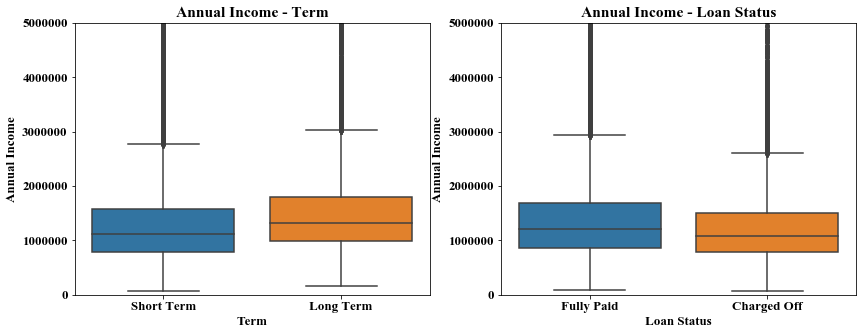

In [46]:
# The relationship between 'Annual Income-Term' & 'Annual Income-Loan Status' is explored for Annual Income <=5000000. 
# In terms of the first boxplot, it can be observed that there is no significance difference between the median 'Annual Income'
# values of Short/Long Term loans, thus there is no particular trend that favors either the selection of 'Short or 'Long Term'
# loans by the borrowers with respect to their 'Annual Salary'. Regarding the 'Annual Income-Loan Status' boxplot, it can be
# stated that the minimum value for both 'Fully Paid-Charged Off' loans with respect to the 'Annual Income' is at the same
# level, whereas a small difference is observed in terms of the 'Annual Income' median, third quartile and  max value statistics
# for these two'Loan Status' types.

f, axes = plt.subplots(1, 2,figsize=(14,5))

sns.boxplot(x='Term',y='Annual Income',data=dataset, orient='v' , ax=axes[0])
axes[0].set_ylim([0, 5000000])
axes[0].set_title('Annual Income - Term')
sns.boxplot(x='Loan Status',y='Annual Income',data=dataset, orient='v' , ax=axes[1])
axes[1].set_ylim([0, 5000000])
axes[1].set_title('Annual Income - Loan Status');

In [47]:
# 'Annual Income' summary statistics based on 'Loan Status'. 
dataset[dataset['Annual Income']<=5000000].groupby('Loan Status')['Annual Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,17132.0,1.228728e+06,653279.483871,76627.0,777940.75,1080957.5,1499480.0,4944807.0
Fully Paid,63133.0,1.360746e+06,712314.504996,81092.0,863550.00,1207336.0,1679220.0,4995328.0


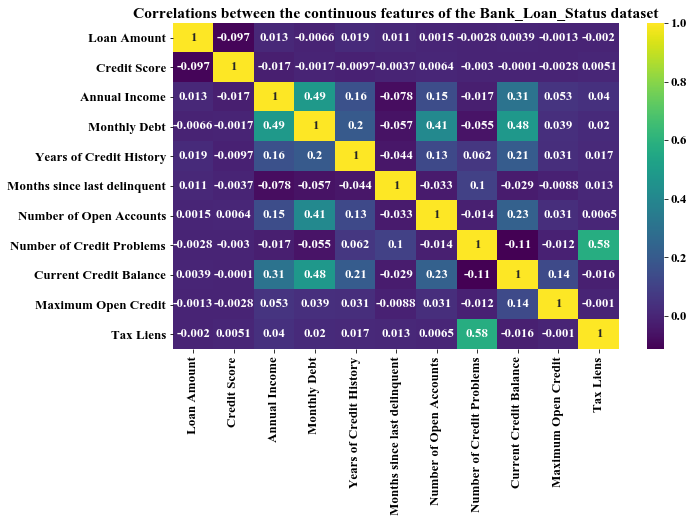

In [48]:
# Heatmap that shows the correlations between the continuous features of the bank loan status dataset.
# Correlation varies between -1 and 1, where a) values close to 1 indicate positive correlation, b) values close to -1
# indicate negative correlation between two variables. For instance, it can be observed that the 'Number of Credit Problems' 
# feature is highly correlated (0.58) with the 'Tax Liens' feature, the 'Annual Income' is correlated (0.49) with 'Monthly Debt'
# and 'Monthly Debt' feature is highly correlated (0.48) with the 'Current Credit Balance' feature
plt.figure(figsize=(10,6))
plt.title('Correlations between the continuous features of the Bank_Loan_Status dataset')
sns.heatmap(dataset.corr(),annot=True,cmap='viridis');

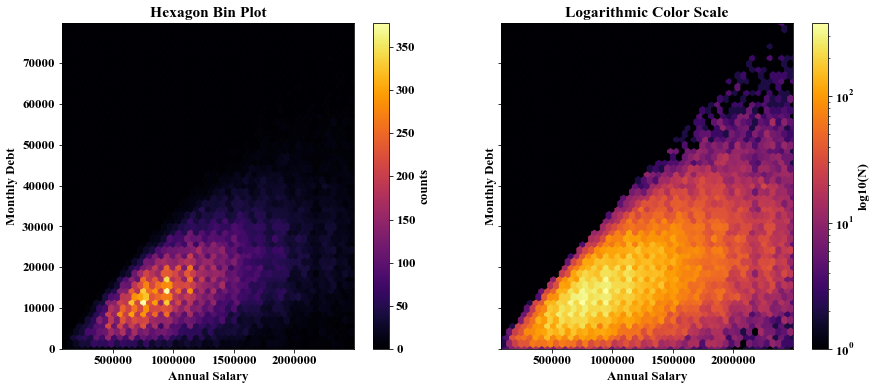

In [49]:
# At cases where features contain thousands or more entries, a hexbin type of plot can be employed to show the relationship
# between two continuous features as it can be more informative than a scatterplot.
# In this cell, the relationship between 'Monthly Debt' and 'Annual Income' is presented due to their correlation as
# previously shown in the correlation matrix. As it can be observed, borrowers with high annual incomes have the option to
# pay higher monthly installments in contrast to borrowers with lower annual income. In terms of the hexbin plot, the highest
# density area(yellow/orange colored hexagon bins), where the points are concentrated(distributed) the most, is the one that
# comprises 'Annual Income' values ranging approximately between 300000-1300000 and 'Monthly Debt' values ranging approximately 
# between 1000-30000.
x = dataset['Annual Income'][(dataset['Monthly Debt']<=100000)&(dataset['Annual Income']<=2500000)]
y = dataset["Monthly Debt"][(dataset['Monthly Debt']<=100000)&(dataset['Annual Income']<=2500000)]
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(13, 6))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("Hexagon Bin Plot")
ax.set_xlabel("Annual Salary")
ax.set_ylabel("Monthly Debt")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("Logarithmic Color Scale")
ax.set_xlabel("Annual Salary")
ax.set_ylabel("Monthly Debt")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

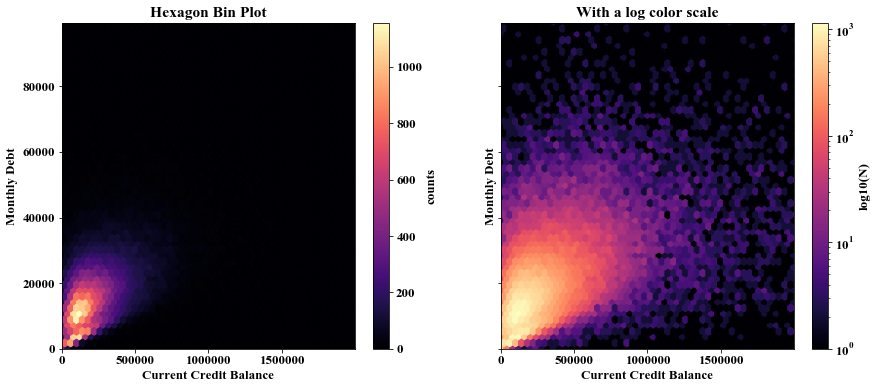

In [50]:
# The relationship between 'Monthly Debt' and 'Current Credit Balance' is presented due to the fact that they are positively
# correlated as seen on the previously constructed heatmap. Here, the highest density area(bright colored hexagon bins),
# where the points are concentrated(distributed) the most, is the one that comprises 'Current Credit Balance' values 
# approximately up to 500000 and 'Monthly Debt' values ranging approximately between 1000-30000.

x = dataset['Current Credit Balance'][(dataset['Monthly Debt']<=100000)&(dataset['Current Credit Balance']<=2000000)]
y = dataset["Monthly Debt"][(dataset['Monthly Debt']<=100000)&(dataset['Current Credit Balance']<=2000000)]

xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(13, 6))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='magma')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("Hexagon Bin Plot")
ax.set_xlabel("Current Credit Balance")
ax.set_ylabel("Monthly Debt")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='magma')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("With a log color scale")
ax.set_xlabel("Current Credit Balance")
ax.set_ylabel("Monthly Debt")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

In [51]:
# A new dataset column 'paid_loan' is created that maps the Loan Status entries ('Fully Paid'/'Charged Off')
# into 1 and 0, so as to enable the use of this feature as the dependent variable during network training and classification
dataset['paid_loan'] = dataset['Loan Status'].map({'Fully Paid':1,'Charged Off':0})

In [52]:
# As it can be observed, The new created column 'paid_loan' consists of binary entries of 1 ('Fully Paid') and 0 ('Charged Off')
dataset[['Loan Status','paid_loan']].head(10)

,Loan Status,paid_loan
Serial ID,,
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Fully Paid,1
5,Charged Off,0
6,Fully Paid,1
7,Charged Off,0
8,Fully Paid,1


# B. Missing Values

*In this section, each bank loan dataset feature that contains missing values is explored so as to assess whether those missing entries can be filled or not. If the missing entries are not to be filled, then either the whole feature could be dropped from the dataset or only the dataset rows that correspond to the missing entries. In order to demonstrate some of the options that could be considered as possible solutions with respect to dealing with missing data, different methods/approaches are provided. In general, there is no particular rule of how to fill missing entries because its case should be examined separately as there are a number of factors that need to be taken into consideration before choosing a specific method (e.g. number of missing entries, data type of the feature, correlations with other dependent variables).*

In [53]:
# Initially, the first step is to drop the 'Loan ID 'and 'Customer ID' columns, since they are of serial type and therefore
# they will not contribute to the ML model training process 
dataset=dataset.drop(['Loan ID','Customer ID'],axis=1)


In [54]:
# As it can be observed,the 'Loan ID' and 'Customer ID' features have now been removed from the dataset
dataset.columns

Index(['Loan Status', 'Loan Amount', 'Term', 'Credit Score', 'Annual Income',
       'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Tax Liens',
       'paid_loan'],
      dtype='object')

In [55]:
# Checking the missing values of each dataset's feature. There are 6 dataset's columns that consist of missing entries:
# 'Credit Score','Annual Income','Years in current job', 'Months since last delinquent', 'Maximum Open Credit' and 'Tax Liens'
dataset.isnull().sum()

Loan Status                         0
Loan Amount                         0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Tax Liens                          10
paid_loan                           0
dtype: int64

In [56]:
# Determining the missing value percentage for each dataset feature so as to get a better understanding of each feature's 
# missing entries per total dataset length. 'Months since last delinquent' column has the highest percestage of missing values
# as more than half of the entries are not filled. 'Annual Income' and 'Credit Score' columns have approximately 19.2% of
# missing values with is still significant percentage. 'Years in current job' have less than 5% of missing entries, whereas
# the last two variables have insignificant amount of missing info (0.01% and 0.002%) therefore they could be easily dropped.
missing_values_perc=100* dataset.isnull().sum()/len(dataset)
missing_values_perc

Loan Status                      0.000
Loan Amount                      0.000
Term                             0.000
Credit Score                    19.154
Annual Income                   19.154
Years in current job             4.222
Home Ownership                   0.000
Purpose                          0.000
Monthly Debt                     0.000
Years of Credit History          0.000
Months since last delinquent    53.141
Number of Open Accounts          0.000
Number of Credit Problems        0.000
Current Credit Balance           0.000
Maximum Open Credit              0.002
Tax Liens                        0.010
paid_loan                        0.000
dtype: float64

In [57]:
# The 'Years in current job' feature is of 'Object' data type
dataset['Years in current job'].dtype

dtype('O')

In [58]:
# Since this variable is an object, the 'NaN' entries are chosen to be replaced with the 'bfill' backward fill method 
# that propagates the value observed after NaN value backward until another non 'NaN'entry appears
dataset['Years in current job'] = dataset['Years in current job'].fillna(method='bfill')


In [59]:
# It can be observed that the 'Years in current job' feature does not contain now one 'NaN 'values. This is because the
# last entry of this column is of 'NaN' value and since the backward filling method was employed, the last entry could not be
# filled and as a result this row will be dropped at the end of this section together with any other remaining rows.
dataset['Years in current job'].isnull().sum()

1

In [60]:
# The last entry of this column has a missing value
dataset['Years in current job'].tail(3)

Serial ID
99997    6 years
99998    9 years
99999        NaN
Name: Years in current job, dtype: object

In [61]:
# The percentage of NaN entries in this feature is 53.14%, which means that more than half of the entries are not 
# filled with values. Since the 'Months since last delinquent' feature comprises the last credit payment(in monthly periods),
# it can be assumed that in this case, the 'NaN' entries  represent the value 0, which is the percentage of borrowers that paid
# their monthly loan on time. Therefore, all 'NaN' entries of this feature are to be filled with 0
dataset['Months since last delinquent']=dataset['Months since last delinquent'].fillna(0)

In [62]:
# By applying fillna(0), it can be observed that the total number of 'NaN' entries has now become 0. 
# Thus, the 'NaN' feature values have been successfully updated and replaced by 0
dataset['Months since last delinquent'].isnull().sum()

0

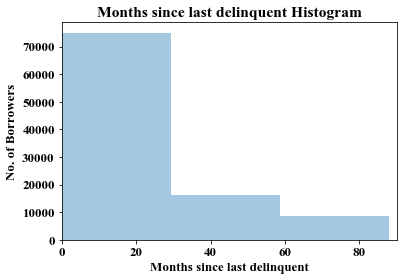

In [63]:
# 'Months since last delinquent' Histogram. Around 73.6%  of past borrowers made their last credit payment at a period of
# 0-27 months. On the other hand, 17.7% of them were being delinquent 28~58 months and  ~8.6% of those borrowers
# had been late in their credit payments for more than 58 months

sns.distplot(dataset['Months since last delinquent'],kde=False,bins=6)
plt.title('Months since last delinquent Histogram')
plt.ylabel('No. of Borrowers')
plt.xlim(0,90);


In [64]:
# Percentage of past borrowers that made their last credit payment for a period of up to 27 months
late_perc=dataset['Months since last delinquent'][dataset['Months since last delinquent']<=27 ].count()
late_perc*100/len(dataset['Months since last delinquent'])

73.59

In [65]:
# Past Borrowers with 'Months since last delinquent'=0, grouped by their Loan Status. The majority of them has managed
# to pay back their loans (around 77%)
pb=dataset[dataset['Months since last delinquent']==0]

pb.groupby('Loan Status').count()['Months since last delinquent']*100/len(dataset[dataset['Months since last delinquent']==0])


Loan Status
Charged Off    23.018536
Fully Paid     76.981464
Name: Months since last delinquent, dtype: float64

In [66]:
# Regarding the 'Credit Score' column, there is a variety of approaches that could be used in order to fill the missing data
# (e.g. filling the missing entries based on the mean,median,mode column value or with interpolation(linear,polynomial,pad)).
# In this case, the proposed approach is to segment all column values into discrete intervals as this technique enables 
# the grouping of this feature entries to'Credit Score' ranges,thus changing the feature's data type from continuous(float type) 
# to categorical(object type). By binning the column entries into different groups, all 'NaN' values will be gathered and
# categorized e.g. as 'Missing Entries' without the need to drop them from the column or fill them.
bin1=[500,600,700,800,10000]
dataset['Credit Score'] = pd.cut(dataset['Credit Score'],bin1,labels=['500-600', '601-700','701-800','801+'])

dataset['Credit Score'] = dataset['Credit Score'].to_frame()
dataset.loc[dataset['Credit Score'].isna(),'Credit Score'] = 'Missing Entries'

In [67]:
# 'Credit Score' column values have now been grouped and the feature is of object data type
dataset['Credit Score'].head()

Serial ID
0            701-800
1    Missing Entries
2            701-800
3            701-800
4    Missing Entries
Name: Credit Score, dtype: object

In [68]:
# As it can be observed, all 'NaN' values  belong to the 'Missing Entries' category 
dataset['Credit Score'].value_counts()

701-800            59229
Missing Entries    19154
601-700            16866
801+                4551
500-600              200
Name: Credit Score, dtype: int64

In [69]:
# Sum of the 'Annual Income' missing values
dataset['Annual Income'].isnull().sum()

19154

In [70]:
# The correlation between the 'Annual Income' and the other continuous variables of the dataset is presented in order to try to
# fill the 'Annual Income' missing values based on the mean value of the 'Annual Income' when the dataset is grouped by the 
# correlated feature. As it has been determined from the corr() function, the 'Monthly Debt' is the feature that has the 
# highest correlation value with the'Annual Income'.
dataset.corr()['Annual Income'].sort_values(ascending=False)[1:]

Monthly Debt                    0.485230
Current Credit Balance          0.312340
Years of Credit History         0.161669
Number of Open Accounts         0.146175
paid_loan                       0.053135
Maximum Open Credit             0.053064
Tax Liens                       0.040167
Months since last delinquent    0.013297
Loan Amount                     0.013112
Number of Credit Problems      -0.017006
Name: Annual Income, dtype: float64

In [71]:
# A copy of the 'Monthly Debt' column is created 
dataset['Monthly_Debt']=dataset['Monthly Debt']

In [72]:
# Similar to the 'Credit Score' column, the copy of the 'Monthly Debt' feature has its entries grouped so as to change its
# data type from 'float' to 'object'
bin2=[0,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,70000,80000,90000,450000]
dataset['Monthly_Debt'] = pd.cut(dataset['Monthly_Debt'],bin2,labels=['0-5k','5-10k','10-15k','15-20k','20-25k','25-30k',
                                                                      '30-35k','35-40k','40-45k','45-50k','50-55k',
                                                                      '55-60k','60-70k','70-80k','80-90k','90+'])

dataset['Monthly_Debt'] = dataset['Monthly_Debt'].to_frame()
dataset.loc[dataset['Monthly_Debt'].isna(),'Monthly_Debt'] = '0'

In [73]:
# The copy of the 'Monthly Debt' feature is now of 'object' dtype
dataset['Monthly_Debt'].dtype

dtype('O')

In [74]:
# Renaming the 'Annual Income' column
dataset.rename(columns={'Annual Income':'Annual_Income'},inplace=True)

In [75]:
# Dataset is grouped by 'Monthly Debt' and the mean 'Annual Income' value per 'Monthly Debt' categories is presented
average_monthly_debt = dataset.groupby('Monthly_Debt').mean()['Annual_Income']
average_monthly_debt

Monthly_Debt
0         1.163473e+06
0-5k      9.138392e+05
10-15k    1.108545e+06
15-20k    1.283739e+06
20-25k    1.466243e+06
25-30k    1.678400e+06
30-35k    1.907797e+06
35-40k    2.145010e+06
40-45k    2.405088e+06
45-50k    2.586775e+06
5-10k     9.716706e+05
50-55k    2.967415e+06
55-60k    3.224227e+06
60-70k    3.826090e+06
70-80k    4.205091e+06
80-90k    5.077005e+06
90+       7.232907e+06
Name: Annual_Income, dtype: float64

In [76]:
# This function takes as input the 'Monthly_Debt' and 'Annual_Income' entries. If an 'Annual_Income' value is 'NaN', then it
# returns the mean 'Annual_Income' values based on the corresponding 'Monthly Debt' entry
def fill_missing_entries(Monthly_Debt,Annual_Income):
    if np.isnan(Annual_Income):
        return average_monthly_debt[Monthly_Debt]
    else:
        return Annual_Income

In [77]:
# An apply function is used so as to fill all the missing values of the 'Annual_Income' column
dataset['Annual_Income'] = dataset.apply(lambda i: fill_missing_entries(i['Monthly_Debt'], i['Annual_Income']), axis=1)

In [78]:
# The copied version of the 'Monthly Debt' feature can now be dropped
dataset=dataset.drop('Monthly_Debt',axis=1)

In [79]:
# The 'Annual_Income' column missing values have now been filled
dataset['Annual_Income'].isnull().sum()

0

In [80]:
# With respect to the last remaining features with missing values, due to the fact that their percentage of 'NaN' entries
# is very small (0.01% for'Tax Liens' and 0.002% for 'Maximum Open Credit') the corresponging rows are to be dropped as
# the removal of those rows will not have any significant effect on the network training process

dataset=dataset.dropna() 
 


In [81]:
# As it can be observed the dataset's features contain no missing values
dataset.isnull().sum()


Loan Status                     0
Loan Amount                     0
Term                            0
Credit Score                    0
Annual_Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Tax Liens                       0
paid_loan                       0
dtype: int64

# C. Categorical Features

*In this section, the categorical features (dtype= Object) are converted to numeric data types so as to be used as ML model inputs during the neural network training process. Object type dataset features(columns) that comprise two or more sub-categories are transformed into dummy variables, where the first column is dropped in order to increase the efficiency of the training process by avoiding the dummy variable trap.* 

In [82]:
# Dataset Features of categorical(object) type
dataset.select_dtypes(['object']).columns

Index(['Loan Status', 'Term', 'Credit Score', 'Years in current job',
       'Home Ownership', 'Purpose'],
      dtype='object')

In [83]:
# The first categorical feature in the dataset is the Loan Status which is also the feature that is to be predicted at the
# end of the training process. It has two sub-categories 'Fully Paid' and 'Charged Off'.
dataset['Loan Status'].value_counts()

Fully Paid     77350
Charged Off    22637
Name: Loan Status, dtype: int64

In [84]:
# At the end of the first section of this project, a new dataset 'paid_loan' was created that transformed the binary 
# categorical feature (Loan Status) into a binary numerical feature of 1('Fully Paid') and 0('Charged Off'). That means that the
# presence of the 'Loan Status' feature in the dataset is no longer required,thus the column is dropped. The 'paid_loan' 
# feature is now the output parameter and will be considered as the dependent variable during the ML model training
 
dataset=dataset.drop('Loan Status',axis=1)
dataset.columns

Index(['Loan Amount', 'Term', 'Credit Score', 'Annual_Income',
       'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Tax Liens',
       'paid_loan'],
      dtype='object')

In [85]:
# The next dtype=object variable of the dataset is the 'Term' feature. It is of binary type with the entries being either
# 'Short Term' or 'Long Term'
dataset['Term'].value_counts()

Short Term    72195
Long Term     27792
Name: Term, dtype: int64

In [86]:
# The get_dummies function is employed to enable the convertion of categorical features into dummy/indicator features.
# The drop_first=True function is used to avoid the Dummy variable Trap,where two or more independent variables are highly
# correlated.By dropping one variable, this trap can be avoided. For example, by removing the Long Term variable, then the 
# Short Term variable will take the value 1 or 0: 1-> Short Term loan or 0 -> not a Short Term Loan (which means
# it is a Long Term Loan)
term_dummies = pd.get_dummies(dataset['Term'],drop_first=True)
dataset = dataset.drop('Term',axis=1)
dataset = pd.concat([dataset,term_dummies],axis=1)

In [87]:
# Term' feature has been replaced by the numeric type feature 'Short Term' ('Long Term' sub-category has been dropped to avoid
# the Dummy Variable Trap)
dataset.columns

Index(['Loan Amount', 'Credit Score', 'Annual_Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Tax Liens', 'paid_loan', 'Short Term'],
      dtype='object')

In [88]:
# The next categorical variable is the 'Credit Score' that consists of the following sub-categories
dataset['Credit Score'].value_counts()

701-800            59223
Missing Entries    19149
601-700            16865
801+                4550
500-600              200
Name: Credit Score, dtype: int64

In [89]:
# The get_dummies() function is applied  so as to transform the sub-categories of the 'Credit Score' categorical feature
# and the drop_first=True  is applied so as to avoid the Dummy variable
# trap 
score_dummies = pd.get_dummies(dataset['Credit Score'],drop_first=True)
dataset = dataset.drop('Credit Score',axis=1)
dataset = pd.concat([dataset,score_dummies],axis=1)

In [90]:
# The 'Credit Score' groups have now been updated ('500-600' sub-category has been dropped to avoid the Dummy Variable Trap)
dataset.columns

Index(['Loan Amount', 'Annual_Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Tax Liens', 'paid_loan', 'Short Term',
       '601-700', '701-800', '801+', 'Missing Entries'],
      dtype='object')

In [91]:
# The next categorical variable is the 'Home Ownership' that consists of the Home Mortgage, the Rent, the Own Home and
# the HaveMortgage entries
dataset['Home Ownership'].value_counts()

Home Mortgage    48406
Rent             42190
Own Home          9177
HaveMortgage       214
Name: Home Ownership, dtype: int64

In [92]:
# The get_dummies() function is applied  so as to transform the sub-categories of the 'Home Ownership' categorical feature
# and the drop_first=True  is applied so as to avoid the Dummy variable
# trap  
home_dummies = pd.get_dummies(dataset['Home Ownership'],drop_first=True)
dataset = dataset.drop('Home Ownership',axis=1)
dataset = pd.concat([dataset,home_dummies],axis=1)

In [93]:
# The 'Home Ownership' feature has been replaced by the numeric type features 'Own Home','Rent'and 'Home Mortgage', whereas  
# the 'HaveMortgage' variable has been dropped to avoid  falling into the Dummy Variable Trap
dataset.columns

Index(['Loan Amount', 'Annual_Income', 'Years in current job', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Tax Liens', 'paid_loan', 'Short Term',
       '601-700', '701-800', '801+', 'Missing Entries', 'Home Mortgage',
       'Own Home', 'Rent'],
      dtype='object')

In [94]:
# 'Purpose' is another object type feature and it consists of the following sub-categories
dataset['Purpose'].value_counts()

Debt Consolidation      78542
OtherPurposes            9286
Home Improvements        5838
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       98
renewable_energy           10
Name: Purpose, dtype: int64

In [95]:
# The get_dummies() function is applied  so as to transform the sub-categories of the 'Purpose' categorical feature
# and the drop_first=True  is applied so as to avoid the Dummy variable
# trap 
purpose_dummies = pd.get_dummies(dataset['Purpose'],drop_first=True)
dataset = dataset.drop('Purpose',axis=1)
dataset = pd.concat([dataset,purpose_dummies],axis=1)

In [96]:
# The 'Purpose' feature has now its sub-categories transformed to numerical(label) type, with the exception of the
# 'Business Loan' variable which has been dropped to avoid the Dummy Variable Trap
dataset.columns

Index(['Loan Amount', 'Annual_Income', 'Years in current job', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Tax Liens',
       'paid_loan', 'Short Term', '601-700', '701-800', '801+',
       'Missing Entries', 'Home Mortgage', 'Own Home', 'Rent', 'Buy House',
       'Buy a Car', 'Debt Consolidation', 'Educational Expenses',
       'Home Improvements', 'Medical Bills', 'OtherPurposes', 'Take a Trip',
       'major_purchase', 'moving', 'renewable_energy', 'small_business',
       'vacation', 'wedding'],
      dtype='object')

In [97]:
# 'Years in current job' sub-categories
dataset['Years in current job'].value_counts()

10+ years    32561
2 years       9548
3 years       8522
< 1 year      8511
5 years       7091
1 year        6744
4 years       6392
6 years       5935
7 years       5800
8 years       4767
9 years       4116
Name: Years in current job, dtype: int64

In [98]:
# The get_dummies() function is applied  so as to transform the sub-categories of the 'Years in current job' categorical feature
# and the drop_first=True  is applied so as to avoid the Dummy variable trap 
year_dummies = pd.get_dummies(dataset['Years in current job'],drop_first=True)
dataset = dataset.drop('Years in current job',axis=1)
dataset = pd.concat([dataset,year_dummies],axis=1)


In [99]:
# The 'Years in current job' groups have been updated ('1 year' sub-category has been dropped to avoid the Dummy Variable Trap)
dataset.columns

Index(['Loan Amount', 'Annual_Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Tax Liens',
       'paid_loan', 'Short Term', '601-700', '701-800', '801+',
       'Missing Entries', 'Home Mortgage', 'Own Home', 'Rent', 'Buy House',
       'Buy a Car', 'Debt Consolidation', 'Educational Expenses',
       'Home Improvements', 'Medical Bills', 'OtherPurposes', 'Take a Trip',
       'major_purchase', 'moving', 'renewable_energy', 'small_business',
       'vacation', 'wedding', '10+ years', '2 years', '3 years', '4 years',
       '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year'],
      dtype='object')

Text(0.5, 1.0, "Correlations of the numeric variables to 'paid_loan' feature")

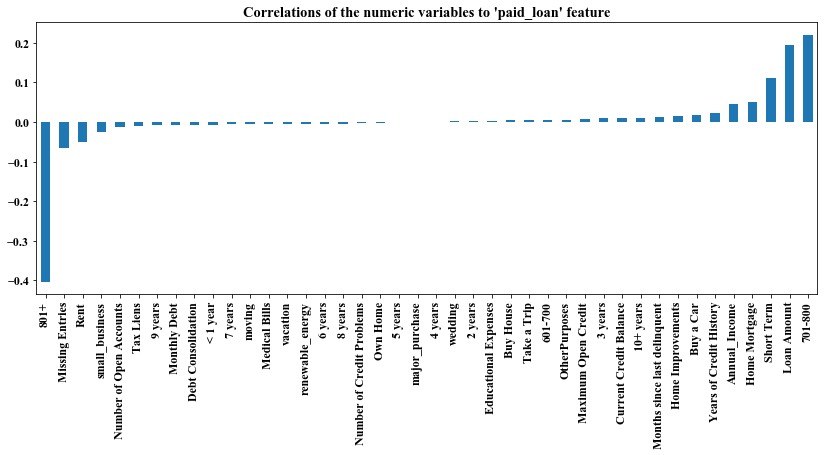

In [100]:
# Bar plot showing the correlations between the 'paid_loan' feature and the other numeric variables. 
plt.figure(figsize=(14,5))
plt.rcParams['font.size']=12
dataset.corr()['paid_loan'].sort_values().drop('paid_loan').plot(kind='bar')
plt.title("Correlations of the numeric variables to 'paid_loan' feature")

## D. Deep Learning Neural Network for Training and Classification

*In this section, the preprocessed dataset features are to be used as inputs for the training of the neural network model. The dataset is to be split for training purposes (90%) and for performance testing (10%) so as to assess the
model classification capabilities. Tensorflow keras library is employed for the construction of the neural network and the performance of the deep learning model is to be evaluated with the use of sklearn library metrics (classification report and confusion matrix)*  

In [101]:
# Dataset features selected for the neural network training process (42 independent/input features and one 
#dependent/output ('paid_loan') feature)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99987 entries, 0 to 99998
Data columns (total 43 columns):
Loan Amount                     99987 non-null int64
Annual_Income                   99987 non-null float64
Monthly Debt                    99987 non-null float64
Years of Credit History         99987 non-null float64
Months since last delinquent    99987 non-null float64
Number of Open Accounts         99987 non-null int64
Number of Credit Problems       99987 non-null int64
Current Credit Balance          99987 non-null int64
Maximum Open Credit             99987 non-null float64
Tax Liens                       99987 non-null float64
paid_loan                       99987 non-null int64
Short Term                      99987 non-null uint8
601-700                         99987 non-null uint8
701-800                         99987 non-null uint8
801+                            99987 non-null uint8
Missing Entries                 99987 non-null uint8
Home Mortgage                  

(0, 7000000)

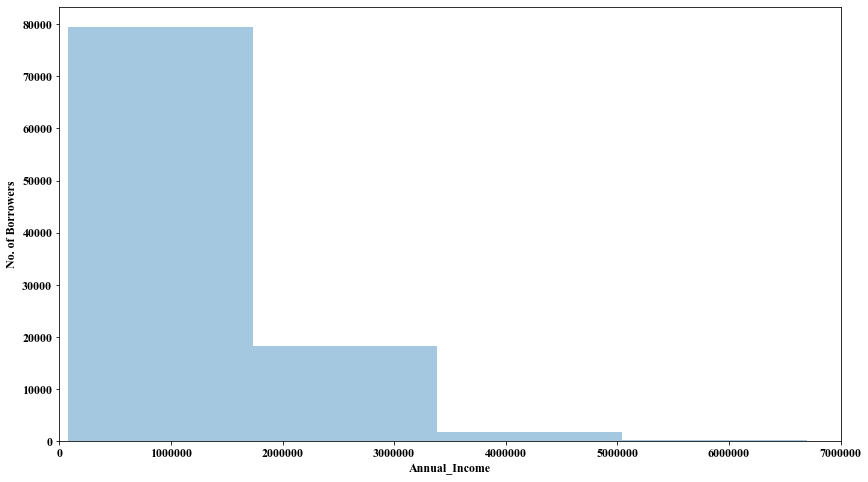

In [102]:
# Based on the distribution of the 'Annual_Income' feature, it can be observed that the total number of borrowers with annual
# salary higher than 5-6 millions is very small. Therefore, in this case study, the focus will be placed on borrowers with
# annual salary up to 6000000 since this scenario a)represents the 99.65% of our dataset length (percentage calculated in the
# following cell) and b) excludes very high annual salaries (e.g. maximum annual salary in this dataset is 1.65E8), which
# that could be outliers, thus affecting the ML model training outcome
plt.figure(figsize=(14,8))
sns.distplot(dataset['Annual_Income'],kde=False,bins=100)
plt.ylabel('No. of Borrowers')
plt.xlim(0,7000000)

In [103]:
# Percentage of borowers with annual salary up to 6000000
dataset[dataset['Annual_Income']<=6000000].count()['Annual_Income']*100/(len(dataset['Annual_Income']))

99.65295488413494

In [104]:
# Data are to be used for training and for validation purposes, thus the necessary libraries and functions are imported
from sklearn.model_selection import train_test_split

In [105]:
# Dataset is updated to include all entries with annual income<=6000000
dataset=dataset[dataset['Annual_Income']<=6000000]

# The independent and dependend variables are
X = dataset.drop('paid_loan',axis=1).values
y = dataset['paid_loan'].values

In [106]:
# The dataset consists of unbalanced 'paid_loan' samples as 77.3% of past borrowers entries  comprise borrowers that have fully  
# paid their loan (value 1), whereas the corresponding percentage of the past borrowers that failed to paid back their loan
# (value 0) is 22.6%. The fact that the samples are unbalanced could affect the percentage of successfull class_predictions 
# with respect to charged_off loans
dataset['paid_loan'].value_counts()*100/len(dataset['paid_loan'])

1    77.331393
0    22.668607
Name: paid_loan, dtype: float64

In [107]:
# Data are split for training and testing,testsize =0.1 which means 10% of the dataset will be used for validation purposes
# to assess the model performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [108]:
# Training Dataset consists of  89676 rows -- 42 independent variables  and one dependent(paid_loan)
X_train.shape

(89676, 42)

In [109]:
# Test Dataset consists of  9964 entries
X_test.shape

(9964, 42)

In [110]:
# The purpose of this scenario is to demonstrate deep learning training/classification based on all dependent & independent 
# variables of the dataset. This is because it is not unusual, for a number of reasons, to include all dataset features as
# ML model inputs without applying any 'feature selection'. 
# The idea behind feature selection is based on the need to select input features that are highly correlated to the output 
# that is to be predicted. The correlation plot with respect to the 'paid_loan' output parameter presented in the previous
# cell is one way to determine the correlations between the dependent and the independent features of the dataset. Another
# feature selection method is the Chi Squared Test(code provided in this cell), where the level of dependence between each
# dataset input variable and the output feature is determined based on the use of statistical hypothesis
'''from sklearn.feature_selection import SelectKBest, chi2
feature_selection = SelectKBest(score_func=chi2, k='all')
feature_selection.fit(X_train, y_train)
X_train_new = feature_selection.transform(X_train)
X_test_new = feature_selection.transform(X_test)
for feature in range(len(feature_selection.scores_)):
    print('Dataset_Feature %d: %.2f' % (feature+1, feature_selection.scores_[feature]))'''

"from sklearn.feature_selection import SelectKBest, chi2\nfeature_selection = SelectKBest(score_func=chi2, k='all')\nfeature_selection.fit(X_train, y_train)\nX_train_new = feature_selection.transform(X_train)\nX_test_new = feature_selection.transform(X_test)\nfor feature in range(len(feature_selection.scores_)):\n    print('Dataset_Feature %d: %.2f' % (feature+1, feature_selection.scores_[feature]))"

In [111]:
# Data Normalization of the independent variables takes place.
from sklearn.preprocessing import StandardScaler
x_scale = StandardScaler()
X_train = x_scale.fit_transform(X_train)
X_test = x_scale.transform(X_test)

In [112]:
# Importing the necessary libraries to create/construct the neural network model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import initializers


In [113]:
# Initially, the network model is defined 
model = Sequential() 

# Use of the he_uniform initializer to set the initial random weights of the model layers. The bias initializer is set to a
# very small value (e.g. 0.01) to ensure that the neurons will fire at the beginning of the training process due to the use
# of a rectified linear unit as transfer (activation) function
initializer = tf.keras.initializers.he_uniform(seed=0)

# First layer neurons are chosen to be 42  which is the number of the independent variables(input layer)
# Selected Activation function has been the rectified linear unit
model.add(Dense(42,activation='relu',kernel_initializer=initializer,bias_initializer=initializers.Constant(0.01)))
                    

# a Dropout layer is added with Dropout rate of 0.2 so as to randomly choose to ignore 20% of the neurons
# at each epoch to prevent overfitting
model.add(Dropout(0.2))

# The neurons number for the next hidden layers are selected to be approximately half the size of the previous hidden layer
model.add(Dense(24,activation='relu',kernel_initializer=initializer,bias_initializer=initializers.Constant(0.01)))
model.add(Dropout(0.2))
model.add(Dense(12,activation='relu',kernel_initializer=initializer,bias_initializer=initializers.Constant(0.01)))
model.add(Dropout(0.2))

# The output layer consists of 1 neuron with a 'sigmoid' activation fuction, as the classification category is of binary type
model.add(Dense(units=1,activation='sigmoid',kernel_initializer=initializer,bias_initializer=initializers.Constant(0.01)))

# The model is compiled with selected loss function= 'binary_crossentropy', whereas the selected optimizer is 'adam'
# with a learning rate of 0.001, epsilon=1e-8 and with the default values of the exponential decay rates for the first and
# second moment estimates
opt = tf.keras.optimizers.Adam(learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8)

model.compile(loss='binary_crossentropy', optimizer=opt)

In [114]:
# Early Stopping to stop the training process if the required conditions are met (e.g not improvement of the
# loss value for 6 consecutive epochs)

from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=6)

In [115]:
# The model is ready to be trained for a maximum of 200 epochs,with 256 samples per gradient update. The training process is
# monitored and at each epoch both training and validation losses can be observed
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size=256,
        
          validation_data=(X_test, y_test),
          callbacks=[early_stop]
          
          )

Train on 89676 samples, validate on 9964 samples
Epoch 1/200
89676/89676 [==============================] - 2s 28us/sample - loss: 0.6465 - val_loss: 0.5271
Epoch 2/200
89676/89676 [==============================] - 1s 15us/sample - loss: 0.5670 - val_loss: 0.5029
Epoch 3/200
89676/89676 [==============================] - 1s 15us/sample - loss: 0.5428 - val_loss: 0.4897
Epoch 4/200
89676/89676 [==============================] - 1s 15us/sample - loss: 0.5243 - val_loss: 0.4776
Epoch 5/200
89676/89676 [==============================] - 1s 15us/sample - loss: 0.5112 - val_loss: 0.4655
Epoch 6/200
89676/89676 [==============================] - 1s 10us/sample - loss: 0.4991 - val_loss: 0.4555
Epoch 7/200
89676/89676 [==============================] - 1s 9us/sample - loss: 0.4878 - val_loss: 0.4481
Epoch 8/200
89676/89676 [==============================] - 1s 9us/sample - loss: 0.4784 - val_loss: 0.4419
Epoch 9/200
89676/89676 [==============================] - 1s 9us/sample - loss: 0.4724 -

89676/89676 [==============================] - 1s 11us/sample - loss: 0.4264 - val_loss: 0.4227
Epoch 77/200
89676/89676 [==============================] - 1s 10us/sample - loss: 0.4271 - val_loss: 0.4228
Epoch 78/200
89676/89676 [==============================] - 1s 11us/sample - loss: 0.4268 - val_loss: 0.4226
Epoch 79/200
89676/89676 [==============================] - 1s 10us/sample - loss: 0.4266 - val_loss: 0.4227
Epoch 00079: early stopping


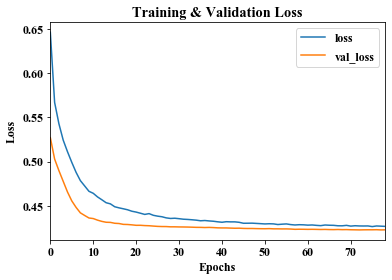

In [127]:
# Training and validation loss plots
train_losses=pd.DataFrame(model.history.history).plot()
plt.title('Training & Validation Loss')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel('Loss',fontweight='bold');

In [117]:
# Importing the metrics 
from sklearn.metrics import classification_report,confusion_matrix

In [118]:
# The X_test values are inserted to the model so as to predict the test 'paid_loan' feature values
pred = model.predict_classes(X_test)

In [119]:
# Classification report of the predicted values (pred) with respect to the target 'paid_loan' values (y_test).

# Based on the classification report, it can be stated that despite the model success in predicting almost all borrowers
# with paid_loan = 1, the unbalanced entries of the target 'paid_loan' feature (Fully paid ~77% & Charged off ~23%)
# had a negative effect on the classification capabilities of the ML model as its classification performance with
# respect to its ability to correctly classify the 'Charged Off' or '0' test samples has been poor due to the low 'recall' 
# and 'f1-score'values. On the other hand, the overall machine learning model  perfomance has been of good accuracy equal to
# 82% which is higher than the minimum expected 76.7% accuracy that corresponds to the 'Fully Paid' or '1' loan feature test
# entries of this unbalanced feature. To exemplify, this means that if the ML model had classified all test samples as
# 'fully paid':1, then the model accuracy would have been equal to the percentage of the 'fully paid' test data, which
# is approximately 76.7%. Thus its overall accuracy of 82% shows its ability to not just capture the 'fully paid' samples,
# but to predict a small but significant percentage of the 'charged off' test samples as well.

# The scope of the presented case study was to use Python programming language(Jupyter Notebook) and take advantage of its
# libraries/functions (numpy,pandas,matplotlib,seaborn, etc.) to demonstrate an approach for a) performing an exploratory
# analysis, b) handling/filling missing entries,c) modifying categorical features and d) training a machine learning model 
# to perform classification. 

# Therefore a trade-off had to be made between the model classification accuracy and a)the demonstration of different 
# options with respect to handling/filling missing info(by presenting a number of options for dealing with the 'NaN' entries 
# instead of deciding to have them dropped where applicable), b) the selection of almost all dataset features for network 
# training (not performing feature selection) 

# In order to increase the percentage of the correct positive identifications(precision) and the percentage of the
# correct actual positives(recall) with respect to the ['Charged Off':'0'] samples, a possible solution would have been to 
# increase the past customer/borrowers records by adding new entries  the borrowers that did not pay their loan so as to
# try and form a balanced dataset that would help the ML model to obtain more accurate input-output relationships and to
# improve its classification accuracy. 
# In addition, another option could be to update current entries(fill missing entries/ensure current values are correct) or
# the insertion of new features/columns into the dataset, strongly correlated with the 'paid_loan' feature, as in this case
# study the current dependencies between input(s)-output are 'weak' and that has a negative impact on the quality/efficiency 
# of the training process and on the classification accuracy.

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.23      0.37      2321
           1       0.81      1.00      0.89      7643

    accuracy                           0.82      9964
   macro avg       0.90      0.61      0.63      9964
weighted avg       0.85      0.82      0.77      9964



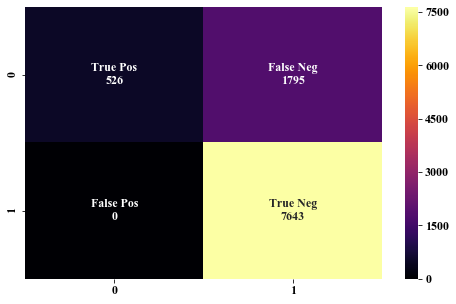

In [120]:
# Confusion matrix consisting of the True Positive, True Negative, False Positive and False Negative values based on
# the model ability to classify whether a new loan would be 'Charged Off' or 'Fully Paid'
conf_m=confusion_matrix(y_test,pred)
#group_names = ['True Pos','False Neg','False Pos','True Neg']
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_m.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,5))
sns.heatmap(conf_m, annot=labels, fmt='', cmap='inferno');

In [121]:
# Transformation of the y_test and pred arrays into pandas dataframes
y_test=pd.DataFrame(y_test,columns=['Test_Values'])
pred=pd.DataFrame(pred,columns=['Predictions'])

In [122]:
# Concat to combine the dataframe objects (y_test and pred)
result=pd.concat([y_test,pred],axis=1)
result.head()#first 5 entries

,Test_Values,Predictions
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1


In [123]:
# To test the model performance on 'new data' , a new entry is created by selecting a random row from the dataset that would 
# be considered as the new model input
import random
random.seed(101)
dataset_index = random.randint(0,len(dataset))

new_input = dataset.drop('paid_loan',axis=1).iloc[dataset_index]
new_input.head(10)

Loan Amount                      335852.00
Annual_Income                   1450232.00
Monthly Debt                      17765.19
Years of Credit History              15.30
Months since last delinquent         52.00
Number of Open Accounts               5.00
Number of Credit Problems             0.00
Current Credit Balance           366586.00
Maximum Open Credit              537284.00
Tax Liens                             0.00
Name: 76458, dtype: float64

In [124]:
# Model prediction based on the scaled new input

new_pred=int(model.predict_classes(x_scale.transform(new_input.values.reshape(1,X_train.shape[1]))))
new_pred

0

In [125]:
###### Target value that is to be compared with the new_pred value
# In this case, the classification has been successfull as the new_pred value is equal to the target value

target_value=dataset.iloc[dataset_index]['paid_loan']
print('Target value is {0} and predicted value is {1}'.format(int(target_value),new_pred))

Target value is 0 and predicted value is 0
